In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None 
pd.options.display.max_rows = None

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import timeit

In [27]:
train = pd.read_csv('../Data/train_games.csv')

In [4]:
train.columns

Index(['game_id_hometeam', 'succesful_play_hometeam', 'shotgun_hometeam',
       'no_huddle_hometeam', 'punt_blocked_hometeam',
       'first_down_rush_hometeam', 'first_down_pass_hometeam',
       'first_down_penalty_hometeam', 'third_down_converted_hometeam',
       'third_down_failed_hometeam',
       ...
       'awayteam_SD', 'awayteam_SEA', 'awayteam_SF', 'awayteam_STL',
       'awayteam_TB', 'awayteam_TEN', 'awayteam_WAS', 'total_points_hometeam',
       'total_points_awayteam', 'hometeam_is_winner'],
      dtype='object', length=116)

In [28]:
X_cols = [col for col in train.columns if not col in ['total_points_hometeam',
       'total_points_awayteam', 'hometeam_is_winner'] ]

In [29]:
X = train[X_cols]
y = train['hometeam_is_winner']

In [7]:
train.head()

,game_id_hometeam,succesful_play_hometeam,shotgun_hometeam,no_huddle_hometeam,punt_blocked_hometeam,first_down_rush_hometeam,first_down_pass_hometeam,first_down_penalty_hometeam,third_down_converted_hometeam,third_down_failed_hometeam,fourth_down_converted_hometeam,fourth_down_failed_hometeam,interception_hometeam,safety_hometeam,penalty_hometeam,tackled_for_loss_hometeam,fumble_lost_hometeam,incomplete_pass_hometeam,qb_hit_hometeam,sack_hometeam,rush_touchdown_hometeam,pass_touchdown_hometeam,return_touchdown_hometeam,field_goal_hometeam,extra_point_hometeam,two_point_conversion_hometeam,succesful_play_awayteam,shotgun_awayteam,no_huddle_awayteam,punt_blocked_awayteam,first_down_rush_awayteam,first_down_pass_awayteam,first_down_penalty_awayteam,third_down_converted_awayteam,third_down_failed_awayteam,fourth_down_converted_awayteam,fourth_down_failed_awayteam,interception_awayteam,safety_awayteam,penalty_awayteam,tackled_for_loss_awayteam,fumble_lost_awayteam,incomplete_pass_awayteam,qb_hit_awayteam,sack_awayteam,rush_touchdown_awayteam,pass_touchdown_awayteam,return_touchdown_awayteam,field_goal_awayteam,extra_point_awayteam,two_point_conversion_awayteam,hometeam_ATL,hometeam_BAL,hometeam_BUF,hometeam_CAR,hometeam_CHI,hometeam_CIN,hometeam_CLE,hometeam_DAL,hometeam_DEN,hometeam_DET,hometeam_GB,hometeam_HOU,hometeam_IND,hometeam_JAC,hometeam_KC,hometeam_MIA,hometeam_MIN,hometeam_NE,hometeam_NO,hometeam_NYG,hometeam_NYJ,hometeam_OAK,hometeam_PHI,hometeam_PIT,hometeam_SD,hometeam_SEA,hometeam_SF,hometeam_STL,hometeam_TB,hometeam_TEN,hometeam_WAS,awayteam_ATL,awayteam_BAL,awayteam_BUF,awayteam_CAR,awayteam_CHI,awayteam_CIN,awayteam_CLE,awayteam_DAL,awayteam_DEN,awayteam_DET,awayteam_GB,awayteam_HOU,awayteam_IND,awayteam_JAC,awayteam_KC,awayteam_MIA,awayteam_MIN,awayteam_NE,awayteam_NO,awayteam_NYG,awayteam_NYJ,awayteam_OAK,awayteam_PHI,awayteam_PIT,awayteam_SD,awayteam_SEA,awayteam_SF,awayteam_STL,awayteam_TB,awayteam_TEN,awayteam_WAS,total_points_hometeam,total_points_awayteam,hometeam_is_winner
0,2009091000,27,38,14,0.0,1.0,18.0,0.0,4.0,10.0,0.0,0.0,2.0,0.0,5.0,3.0,1.0,8.0,7.0,4.0,0.0,1.0,0.0,2,1,0,20,18,0,0.0,2.0,14.0,2.0,4.0,9.0,0.0,0.0,1.0,0.0,6.0,5.0,1.0,12.0,3.0,1.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.0,10.0,1
1,2009091300,23,17,0,0.0,3.0,15.0,1.0,6.0,9.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,14.0,2.0,2.0,0.0,2.0,0.0,2,1,0,21,21,0,0.0,4.0,11.0,1.0,4.0,7.0,1.0,0.0,1.0,0.0,4.0,2.0,3.0,8.0,4.0,4.0,0.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0,7.0,1
2,2009091301,37,20,43,1.0,11.0,20.0,1.0,10.0,7.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,16.0,0.0,1.0,2.0,3.0,0.0,1,5,0,12,23,2,0.0,1.0,8.0,2.0,2.0,8.0,1.0,1.0,0.0,0.0,6.0,5.0,0.0,8.0,2.0,3.0,0.0,2.0,0.0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.0,17.0,1
3,2009091302,16,24,5,0.0,4.0,8.0,2.0,3.0,13.0,2.0,1.0,5.0,0.0,6.0,4.0,2.0,15.0,9.0,5.0,1.0,0.0,1.0,1,1,0,20,26,2,0.0,9.0,7.0,1.0,5.0,8.0,1.0,1.0,1.0,0.0,8.0,1.0,1.0,11.0,1.0,2.0,1.0,2.0,0.0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,16.0,24.0,0
4,2009091303,25,23,0,0.0,4.0,12.0,0.0,5.0,10.0,1.0,1.0,2.0,0.0,4.0,3.0,0.0,10.0,4.0,3.0,1.0,0.0,0.0,0,1,0,19,31,0,0.0,3.0,7.0,0.0,3.0,9.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,11.0,5.0,3.0,0.0,1.0,0.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,12.0,0


In [30]:
train.shape

(2020, 123)

In [31]:
train.hometeam_is_winner.value_counts(normalize = True)

1    0.567822
0    0.432178
Name: hometeam_is_winner, dtype: float64

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# models = { }

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
cross_val_score(clf, X, y, cv=10)

In [32]:
cross_validate(LogisticRegression(), X, y, cv = 10, scoring = 'accuracy')

{'fit_time': array([0.02310705, 0.01605988, 0.01529408, 0.00911498, 0.00914812,
        0.00812101, 0.00730419, 0.00671291, 0.00777102, 0.00705576]),
 'score_time': array([0.00273705, 0.00321317, 0.00330997, 0.00198483, 0.00375605,
        0.00197005, 0.0019269 , 0.00195408, 0.00197697, 0.00193691]),
 'test_score': array([0.56930693, 0.56930693, 0.56930693, 0.56930693, 0.56930693,
        0.56930693, 0.56930693, 0.56435644, 0.56435644, 0.56435644])}

In [33]:
cross_validate(RandomForestClassifier(), X, y, cv = 10, scoring = 'accuracy')

{'fit_time': array([0.27709723, 0.25054789, 0.25274897, 0.25303316, 0.25889826,
        0.2658391 , 0.27454329, 0.2586062 , 0.27492094, 0.25060892]),
 'score_time': array([0.01055193, 0.01059723, 0.01050997, 0.0106988 , 0.01082802,
        0.01239085, 0.01045179, 0.01092386, 0.01052713, 0.01047325]),
 'test_score': array([0.86633663, 0.81683168, 0.81188119, 0.89108911, 0.88118812,
        0.85148515, 0.85148515, 0.90594059, 0.83168317, 0.83168317])}

In [12]:
model = DecisionTreeClassifier()

In [13]:
fitmodel = model.fit(X, y)

In [15]:
from sklearn import tree

[Text(177.9800561797753, 209.6742857142857, 'X[49] <= 2.5\ngini = 0.493\nsamples = 1791\nvalue = [787, 1004]'),
 Text(96.57240168539326, 194.14285714285714, 'X[24] <= 1.5\ngini = 0.413\nsamples = 1200\nvalue = [350, 850]'),
 Text(38.440870786516854, 178.61142857142858, 'X[23] <= 1.5\ngini = 0.48\nsamples = 399\nvalue = [239, 160]'),
 Text(17.398314606741575, 163.07999999999998, 'X[49] <= 0.5\ngini = 0.301\nsamples = 141\nvalue = [115, 26]'),
 Text(9.404494382022472, 147.54857142857142, 'X[46] <= 0.5\ngini = 0.498\nsamples = 30\nvalue = [14, 16]'),
 Text(5.642696629213484, 132.01714285714286, 'X[11] <= 1.5\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(3.761797752808989, 116.48571428571428, 'X[28] <= 6.5\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(1.8808988764044945, 100.9542857142857, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(5.642696629213484, 100.9542857142857, 'X[9] <= 6.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(3.761797752808989, 85.4228571428

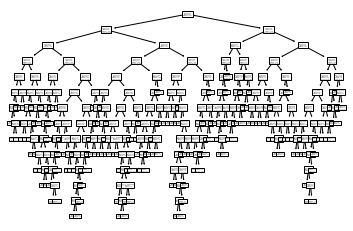

In [16]:
tree.plot_tree(fitmodel)

In [17]:
import matplotlib.pyplot as plt

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(fitmodel, 
                   feature_names= X.columns,  
                   class_names= y.values(),
                   filled=True)

ValueError: Boolean array expected for the condition, not int64

<Figure size 1800x1440 with 0 Axes>